The table below shows election results in two states, Madhya Pradesh and Rajasthan, broken down by party.

| State            | Party  | Seats_Won | Total_Seats | Voter_Turnout (%) |
|------------------|--------|-----------|------------|------------------|
| **Madhya Pradesh** | BJP    | 163       | 230        | 72.1             |
| **Madhya Pradesh** | INC    | 66        | 230        | 72.1             |
| **Madhya Pradesh** | BSP    | 0         | 230        | 72.1             |
| **Madhya Pradesh** | Others | 1         | 230        | 72.1             |
| **Rajasthan**      | BJP    | 115       | 200        | 74.2             |
| **Rajasthan**      | INC    | 69        | 200        | 74.2             |
| **Rajasthan**      | BSP    | 2         | 200        | 74.2             |
| **Rajasthan**      | Others | 13        | 200        | 74.2             |  


And perform the following tasks:
- Check if the file `election_data.csv` exists in the directory. If not, create the file and write the election data into it. Handle file-related exceptions gracefully.
- Read the data into a Pandas DataFrame and calculate the percentage of seats won by each party. Add this as a new column named Seats_Percentage.
- Determine the party with the highest number of seats in each state and display their names.
- Create a bar chart showing the number of seats won by each party in each state using Matplotlib or Seaborn.
- Ensure your script includes exception handling for file reading, writing, and any potential calculation errors.


In [3]:
import pandas as pd

election_data = pd.DataFrame({
    "State": ["Madhya Pradesh", "Madhya Pradesh", "Madhya Pradesh", "Madhya Pradesh", "Rajasthan", "Rajasthan", "Rajasthan", "Rajasthan"],
    "Party": ["BJP", "INC", "BSP", "Others", "BJP", "INC", "BSP", "Others"],
    "Seats_Won": [163, 66, 0, 1, 115, 69, 2, 13],
    "Total_Seats": [230, 230, 230, 230, 200, 200, 200, 200],
    "Voter_Turnout (%)": [72.1, 72.1, 72.1, 72.1, 74.2, 74.2, 74.2, 74.2]
})
try:
    pd.read_csv('election_data.csv')
except FileNotFoundError:
    election_data.to_csv('election_data.csv')

In [4]:
df=pd.read_csv('election_data.csv')
df['Seats_Percentage']=(df['Seats_Won']/df['Total_Seats'])*100
df.head()

,State,Party,Seats_Won,Total_Seats,Voter_Turnout (%),Seats_Percentage
0,Madhya Pradesh,BJP,163,230,72.1,70.869565
1,Madhya Pradesh,INC,66,230,72.1,28.695652
2,Madhya Pradesh,BSP,0,230,72.1,0.000000
3,Madhya Pradesh,Others,1,230,72.1,0.434783
4,Rajasthan,BJP,115,200,74.2,57.500000


In [5]:
temp=df.pivot(index='State', columns='Party' , values='Seats_Won')
temp

Party,BJP,BSP,INC,Others
State,,,,
Madhya Pradesh,163,0,66,1
Rajasthan,115,2,69,13


In [6]:
q=temp.idxmax(axis=1)
res=pd.DataFrame(q,columns=['Winning_Party'])
res.head()

,Winning_Party
State,
Madhya Pradesh,BJP
Rajasthan,BJP


(array([0, 1]), [Text(0, 0, 'Madhya Pradesh'), Text(1, 0, 'Rajasthan')])

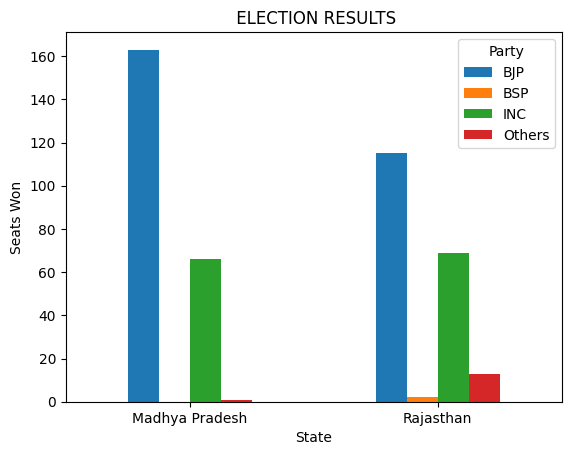

In [7]:
import matplotlib.pyplot as plt
temp.plot(kind='bar')
plt.ylabel('Seats Won')
plt.title(" ELECTION RESULTS")
plt.xticks(rotation=0)
